# This document is for the visualization of reference/control states. For that reason, it is deliberately a jupyter notebook to facilitate graphing of specific states against the policy states of interest.

In [7]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter(action="ignore", category=FutureWarning)

# Read in data
df = pd.read_parquet("..\\20_intermediate_files\\wp_avg_trimmed.parquet")
print(df.head())

# Group by State and Year and take a sum of the CALC_BASE_WT_IN_GM column
state_avg = (
    df.groupby(["BUYER_STATE", "TRANSACTION_DATE"])["CALC_BASE_WT_IN_GM"]
    .sum()
    .reset_index()
)
print(state_avg.head())

  BUYER_STATE BUYER_COUNTY  TRANSACTION_DATE  CALC_BASE_WT_IN_GM
0          IN        ADAMS              2006            1.785600
1          IN        ADAMS              2007            1.709772
2          IN        ADAMS              2008            1.812102
3          IN        ADAMS              2009            1.838243
4          IN        ADAMS              2010            1.922049
  BUYER_STATE  TRANSACTION_DATE  CALC_BASE_WT_IN_GM
0          AK              2006           48.492268
1          AK              2007           44.239014
2          AK              2008           39.811314
3          AK              2009           38.526320
4          AK              2010           39.742773


In [2]:
# print unique TRANSACTION_DATE values to ensure we have the full set of dates.
print(state_avg["TRANSACTION_DATE"].unique())

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


We are going to look at the gross (sum) of the DEA defined metric CALC_BASE_WT_GM over all counties per year to identify similar behavior between states. This will allow us to identify control states. Looking at gross behavior will still provide us with viable controls even if the states have different populations since we are interested in the relative behavior of the states.

We will take a +- 5 year window around the policy year to identify the control states. We will then look at the policy states and the control states to see if the policy states follow the same behavior as the control states.

## Washington Data

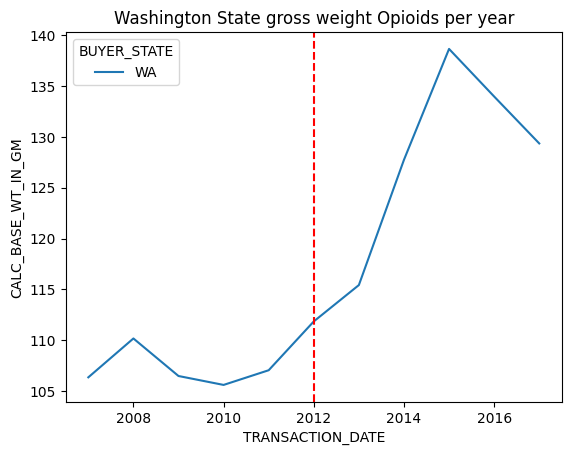

In [16]:
wa_data = state_avg[
    (state_avg["BUYER_STATE"] == "WA")
    & (state_avg["TRANSACTION_DATE"] > 2006)
    & (state_avg["TRANSACTION_DATE"] < 2018)
]
sns.lineplot(
    data=wa_data, x="TRANSACTION_DATE", y="CALC_BASE_WT_IN_GM", hue="BUYER_STATE"
)
plt.axvline(x=2012, color="r", linestyle="--")
plt.title("Washington State gross weight Opioids per year")
plt.show()

After plotting all states in the dataset we saw that AZ, CA, IA, ID, NE, and OR are appropriate control states for WA. We will now look at the data for these states.

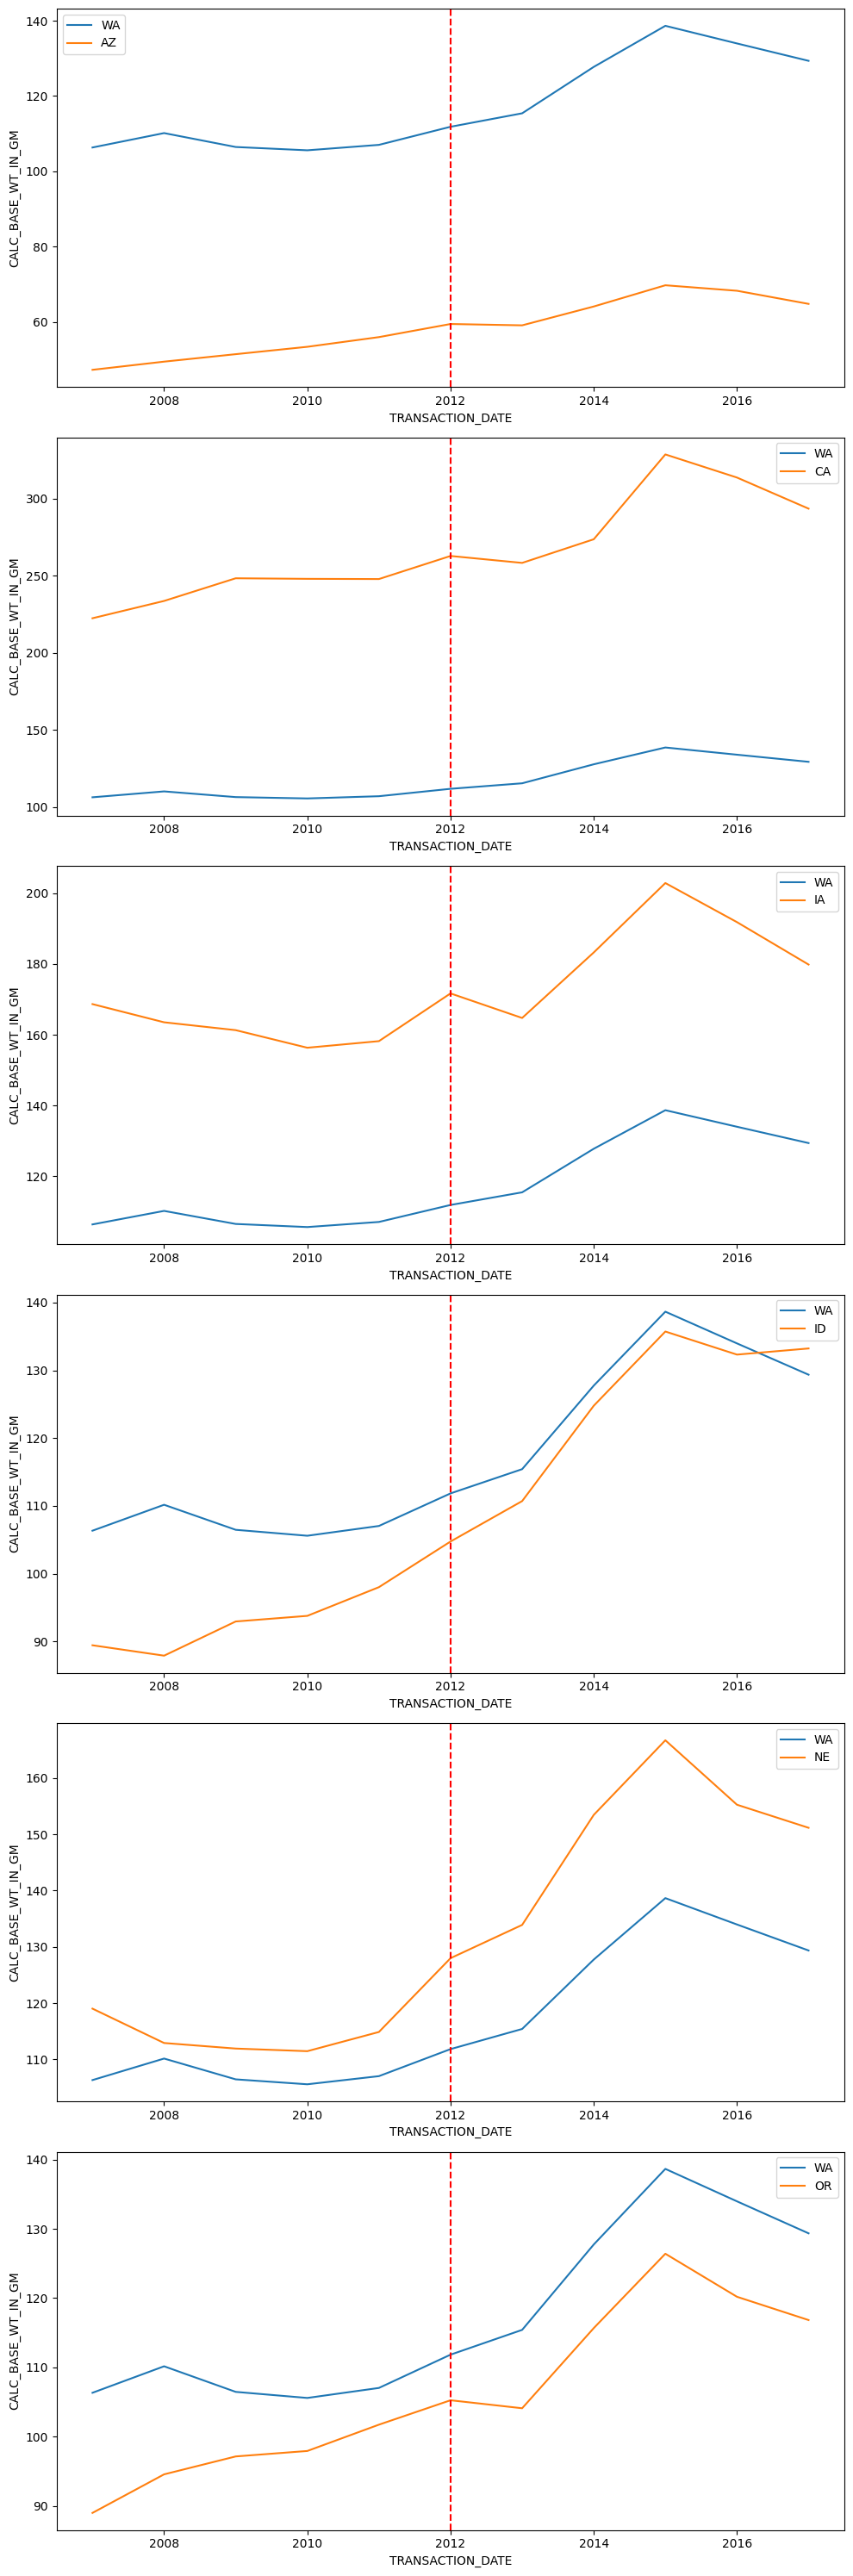

In [27]:
import matplotlib.pyplot as plt

# Get the unique states
states = state_avg["BUYER_STATE"].unique()
controls = ["AZ", "CA", "IA", "ID", "NE", "OR"]

# Create a figure with a subplot for each state
fig, axs = plt.subplots(len(controls), 1, figsize=(10, len(controls) * 5))

for ax, state in zip(axs, controls):
    if state in controls:
        # Get the data for the current state
        state_data = state_avg[
            (state_avg["BUYER_STATE"] == state)
            & (2006 < state_avg["TRANSACTION_DATE"])
            & (state_avg["TRANSACTION_DATE"] < 2018)
        ]

        # Plot the Florida data
        sns.lineplot(
            ax=ax,
            data=wa_data,
            x="TRANSACTION_DATE",
            y="CALC_BASE_WT_IN_GM",
            label="WA",
        )

        # Plot the data for the current state
        sns.lineplot(
            ax=ax,
            data=state_data,
            x="TRANSACTION_DATE",
            y="CALC_BASE_WT_IN_GM",
            label=state,
        )
        ax.axvline(x=2012, color="r", linestyle="--")

plt.tight_layout()
plt.show()

# FL Data


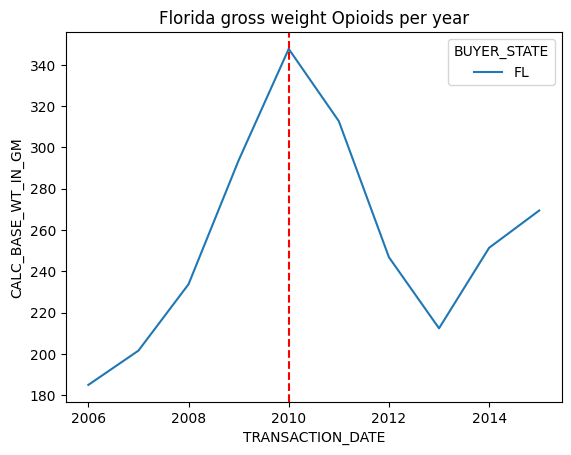

In [29]:
fl_data = state_avg[
    (state_avg["BUYER_STATE"] == "FL")
    & (state_avg["TRANSACTION_DATE"] > 2004)
    & (state_avg["TRANSACTION_DATE"] < 2016)
]
sns.lineplot(
    data=fl_data, x="TRANSACTION_DATE", y="CALC_BASE_WT_IN_GM", hue="BUYER_STATE"
)
plt.axvline(x=2010, color="r", linestyle="--")
plt.title("Florida gross weight Opioids per year")
plt.show()

After plotting all the states against Florida, we see that IN, MO, NC, TN, TX, and VA are appropriate control states for FL. We will now look at the data for these states.

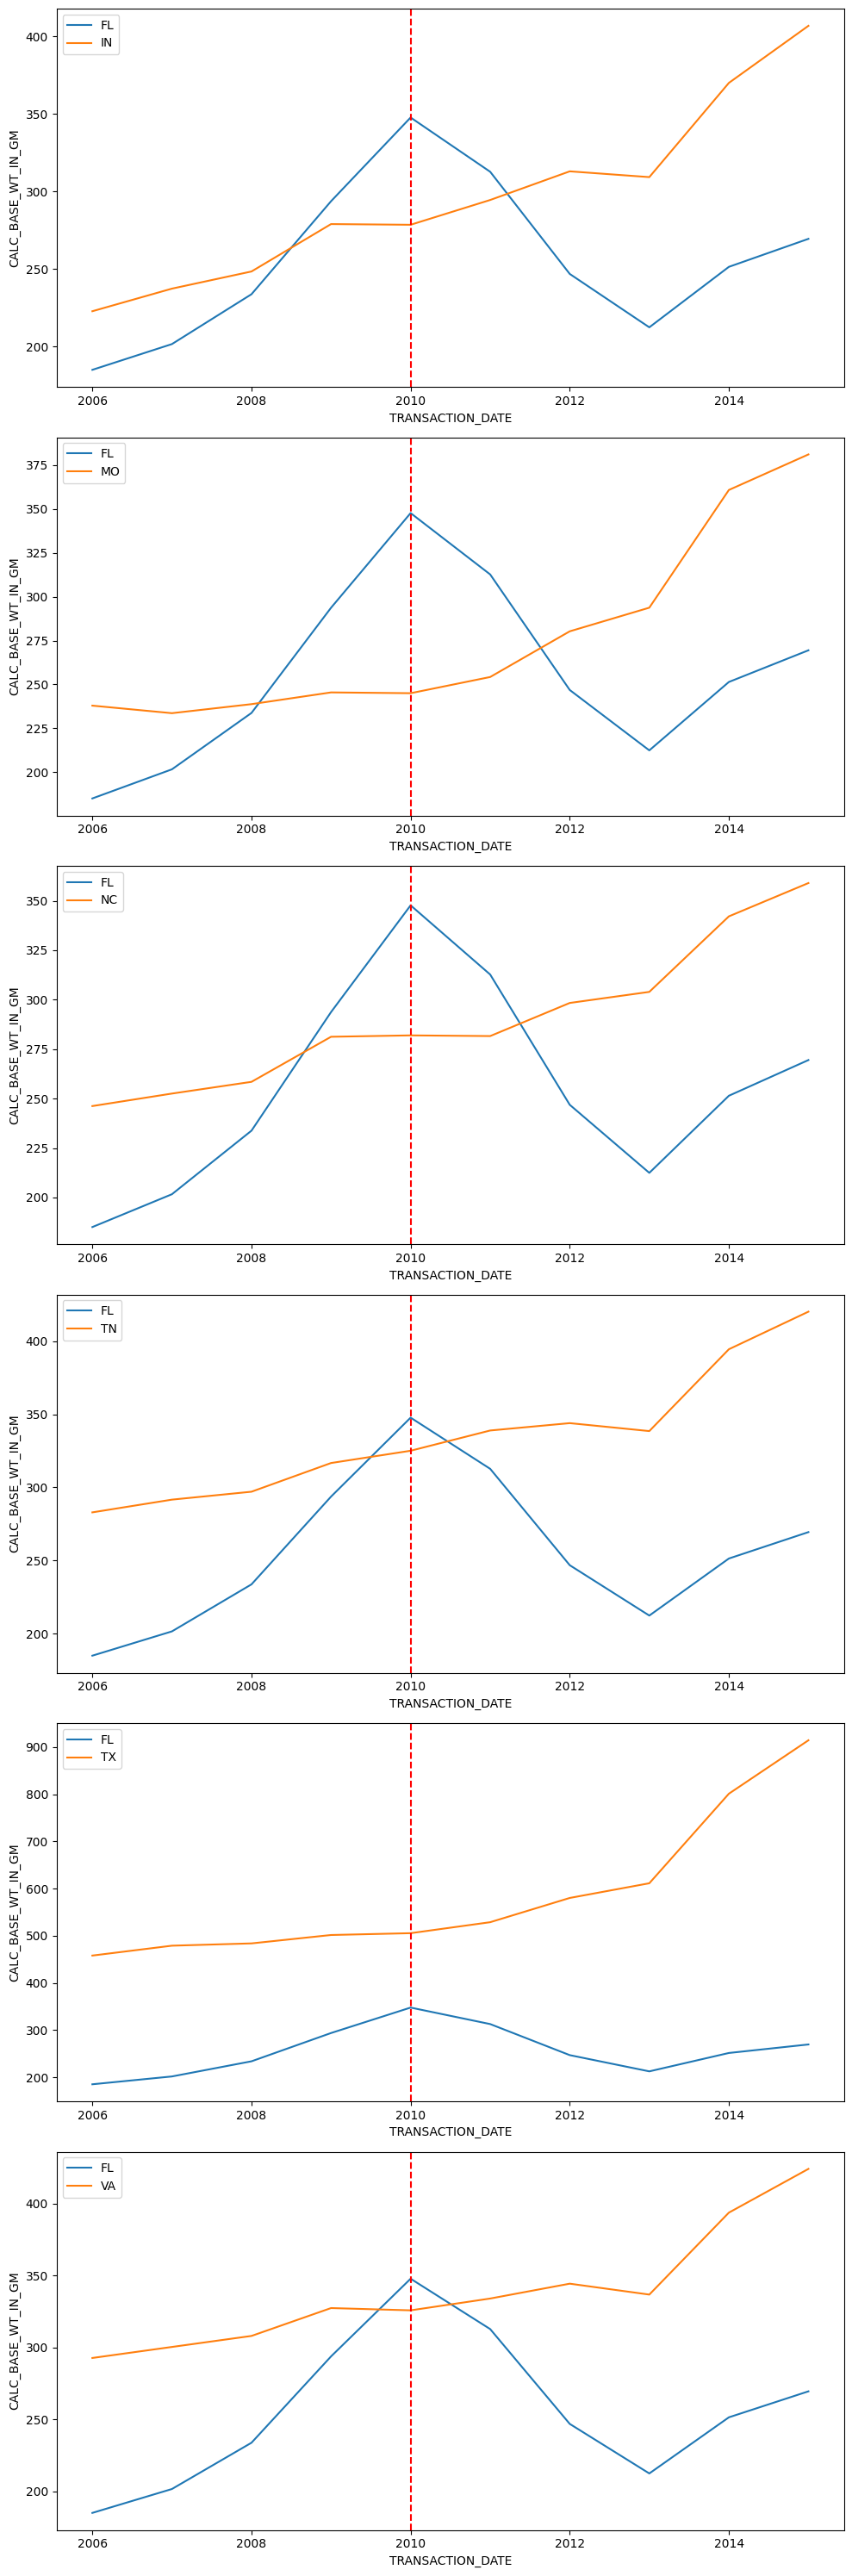

In [33]:
controls1 = ["IN", "MO", "NC", "TN", "TX", "VA"]
# Create a figure with a subplot for each state
fig, axs = plt.subplots(len(controls1), 1, figsize=(10, len(controls1) * 5))

for ax, state in zip(axs, controls1):
    if state in controls1:
        # Get the data for the current state
        state_data = state_avg[
            (state_avg["BUYER_STATE"] == state)
            & (2004 < state_avg["TRANSACTION_DATE"])
            & (state_avg["TRANSACTION_DATE"] < 2016)
        ]

        # Plot the Florida data
        sns.lineplot(
            ax=ax,
            data=fl_data,
            x="TRANSACTION_DATE",
            y="CALC_BASE_WT_IN_GM",
            label="FL",
        )

        # Plot the data for the current state
        sns.lineplot(
            ax=ax,
            data=state_data,
            x="TRANSACTION_DATE",
            y="CALC_BASE_WT_IN_GM",
            label=state,
        )
        ax.axvline(x=2010, color="r", linestyle="--")

plt.tight_layout()
plt.show()